In [1]:
from glob import glob

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 100

In [3]:
df = pd.concat(
    [pd.read_json(path, lines=True) for path in glob("results/*.json")],
    ignore_index=True
)

In [4]:
df.head(2)

,bids_dir,method,workers,py_version,hostname,version,elapsed,size_mb
0,/ocean/projects/med220004p/shared/data_raw/NKI...,bids2table,64,"3.10.11 (main, May 16 2023, 00:28:57) [GCC 11....",r119.ib.bridges2.psc.edu,0.1.dev29+gb7b1658,10.730514,4.816
1,/ocean/projects/med220004p/shared/data_raw/NKI...,ancpbids,1,"3.10.11 (main, May 16 2023, 00:28:57) [GCC 11....",r026.ib.bridges2.psc.edu,0.2.2,470.089712,NaN


In [5]:
colors = {
    "pybids": "r",
    "ancpbids": "g",
    "bids2table": "b",
}

configs = [
    ("pybids", 1),
    ("ancpbids", 1),
    ("bids2table", 1),
    ("bids2table", 8),
    ("bids2table", 64),
]

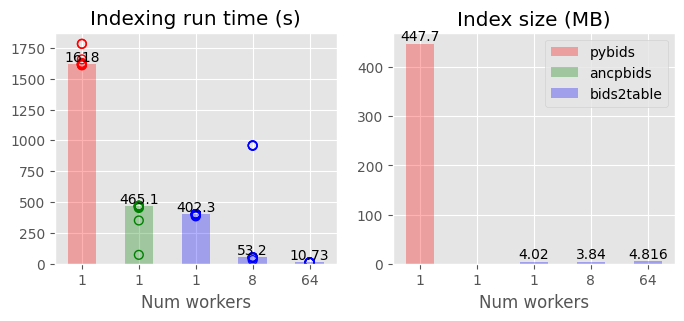

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 3))

# Run time
plt.sca(axs[0])

ticklabels = []
for ii, (method, workers) in enumerate(configs):
    group = df.query(f"method == '{method}' and workers == {workers}")

    elapsed = group["elapsed"]
    med_elapsed = np.median(elapsed)

    color = colors[method]
    label = method if workers == 1 else "_"

    bar = plt.bar(ii, med_elapsed, width=0.5, color=color, label=label, alpha=0.3)

    x = np.full_like(elapsed, ii)
    plt.scatter(x, elapsed, s=40, lw=1, edgecolors=color, color="none", label="_")
    
    plt.bar_label(bar, fmt="%.4g")

    ticklabels.append(workers)

plt.xticks(np.arange(len(ticklabels)), ticklabels)
plt.xlabel("Num workers")

plt.title("Indexing run time (s)")

# Size
plt.sca(axs[1])

ticklabels = []
for ii, (method, workers) in enumerate(configs):
    group = df.query(f"method == '{method}' and workers == {workers}")

    med_size = np.median(group["size_mb"])

    color = colors[method]
    label = method if workers == 1 else "_"

    bar = plt.bar(ii, med_size, width=0.5, color=color, label=label, alpha=0.3)
    plt.bar_label(bar, fmt="%.4g")

    ticklabels.append(workers)

plt.xticks(np.arange(len(ticklabels)), ticklabels)
plt.xlabel("Num workers")

plt.title("Index size (MB)")
plt.legend()

f.set_facecolor("none")

plt.savefig(f"figures/indexing_performance.png", bbox_inches="tight", dpi=300)